In [1]:
import os
import requests
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
from openai import OpenAI


In [2]:
# Load environment variables in a file called .env

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

# Check the key

if not api_key:
    print("No API key was found - please head over to the troubleshooting notebook in this folder to identify & fix!")
elif not api_key.startswith("sk-proj-"):
    print("An API key was found, but it doesn't start sk-proj-; please check you're using the right key - see troubleshooting notebook")
elif api_key.strip() != api_key:
    print("An API key was found, but it looks like it might have space or tab characters at the start or end - please remove them - see troubleshooting notebook")
else:
    print("API key found and looks good so far!")

API key found and looks good so far!


In [3]:
openai = OpenAI()

In [4]:
class Website:
# A Utility class to represent a website that we have scraped
    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

In [5]:
ed = Website("https://www.tomshardware.com/pc-components/cpus/intels-fastest-gaming-chip-hits-all-time-low-for-black-friday-core-i9-14900k-drops-to-usd413")
print(ed.title)
print(ed.text)

Intel's fastest gaming chip hits all-time low for Cyber Monday — Core i9-14900K drops to $413 | Tom's Hardware
Skip to main content
Open menu
Close menu
Tom's Hardware
Tom's Hardware
Search
Search Tom's Hardware
RSS
US Edition
UK
US
Australia
Canada
Best Picks
Raspberry Pi
CPUs
GPUs
3D Printers
News
Coupons
More
Newsletter
Reviews
PC Components
Motherboards
SSDs
PC Building
Monitors
Laptops
Gaming
Cooling
RAM
Power Supplies
Cases
3D Printers
Desktops
Overclocking
Peripherals
About Us
Forums
Trending
Black Friday SSD Deals Live
15 under-$50 gadgets
Black Friday Monitor Deals Live
Best Black Friday Tech Deals
Core Ultra 9 285K
PC Components
CPUs
Intel's fastest gaming chip hits all-time low for Cyber Monday — Core i9-14900K drops to $413
Deals
By
Roshan Ashraf Shaikh
published
30 November 2024
Intel's flagship Raptor Lake Refresh CPU drops to a very attractive price.
Comments
(1)
When you purchase through links on our site, we may earn an affiliate commission.
Here’s how it works
.
(Imag

Types of prompts

You may know this already - but if not, you will get very familiar with it!

Models like GPT4o have been trained to receive instructions in a particular way.

They expect to receive:

A system prompt that tells them what task they are performing and what tone they should use

A user prompt -- the conversation starter that they should reply to

In [6]:
system_prompt = "You are an assistant that analyzes the contents of a website \
and provides a short summary, ignoring text that might be navigation related. \
Respond in markdown."

In [7]:
def user_prompt_for(website):
    user_prompt = f"You are looking at a website titled {website.title}"
    user_prompt += "\nThe contents of this website is as follows; \
please provide a short summary of this website in markdown. \
If it includes news or announcements, then summarize these too.\n\n"
    user_prompt += website.text
    return user_prompt

In [8]:
print(user_prompt_for(ed))

You are looking at a website titled Intel's fastest gaming chip hits all-time low for Cyber Monday — Core i9-14900K drops to $413 | Tom's Hardware
The contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.

Skip to main content
Open menu
Close menu
Tom's Hardware
Tom's Hardware
Search
Search Tom's Hardware
RSS
US Edition
UK
US
Australia
Canada
Best Picks
Raspberry Pi
CPUs
GPUs
3D Printers
News
Coupons
More
Newsletter
Reviews
PC Components
Motherboards
SSDs
PC Building
Monitors
Laptops
Gaming
Cooling
RAM
Power Supplies
Cases
3D Printers
Desktops
Overclocking
Peripherals
About Us
Forums
Trending
Black Friday SSD Deals Live
15 under-$50 gadgets
Black Friday Monitor Deals Live
Best Black Friday Tech Deals
Core Ultra 9 285K
PC Components
CPUs
Intel's fastest gaming chip hits all-time low for Cyber Monday — Core i9-14900K drops to $413
Deals
By
Roshan Ashraf Shaikh
published
30 Novemb

Messages

The API from OpenAI expects to receive messages in a particular structure. Many of the other APIs share this structure:

[
    {"role": "system", "content": "system message goes here"},
    
    {"role": "user", "content": "user message goes here"}
]

In [9]:
def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

In [10]:
messages_for(ed)

[{'role': 'system',
  'content': 'You are an assistant that analyzes the contents of a website and provides a short summary, ignoring text that might be navigation related. Respond in markdown.'},
 {'role': 'user',
  'content': "You are looking at a website titled Intel's fastest gaming chip hits all-time low for Cyber Monday — Core i9-14900K drops to $413 | Tom's Hardware\nThe contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.\n\nSkip to main content\nOpen menu\nClose menu\nTom's Hardware\nTom's Hardware\nSearch\nSearch Tom's Hardware\nRSS\nUS Edition\nUK\nUS\nAustralia\nCanada\nBest Picks\nRaspberry Pi\nCPUs\nGPUs\n3D Printers\nNews\nCoupons\nMore\nNewsletter\nReviews\nPC Components\nMotherboards\nSSDs\nPC Building\nMonitors\nLaptops\nGaming\nCooling\nRAM\nPower Supplies\nCases\n3D Printers\nDesktops\nOverclocking\nPeripherals\nAbout Us\nForums\nTrending\nBlack Friday SSD 

In [11]:
def summarize(url):
    website = Website(url)
    response = openai.chat.completions.create(
        model = "gpt-4o-mini",
        messages = messages_for(website)
    )
    return response.choices[0].message.content

In [12]:
summarize("https://www.tomshardware.com/pc-components/cpus/intels-fastest-gaming-chip-hits-all-time-low-for-black-friday-core-i9-14900k-drops-to-usd413")

'# Summary of "Intel\'s fastest gaming chip hits all-time low for Cyber Monday — Core i9-14900K drops to $413 | Tom\'s Hardware"\n\nThe article discusses a significant price drop for Intel\'s Core i9-14900K processor, which is now available for $413.39 on Amazon, making it an attractive option for gamers and PC builders. This CPU features a total of 24 cores (8 Performance-cores and 16 Efficient-cores) and achieves impressive clock speeds, with the P-cores reaching up to 6 GHz.\n\nKey details include:\n\n- **Pricing:** The price is down from $619 and includes a $25 discount, with a further $40 coupon available for the K variant (Core i9-14900KF).\n- **Compatibility:** The chip retains compatibility with LGA1700 motherboards.\n- **Graphics:** The Core i9-14900K has built-in graphics, beneficial for diagnostics without a discrete graphics card.\n- **Updates:** Previous voltage issues reported with the Raptor Lake Refresh have been addressed through firmware updates.\n- **Benchmark Status

In [13]:
def display_summary(url):
    summary = summarize(url)
    display(Markdown(summary))

In [14]:
display_summary("https://www.tomshardware.com/pc-components/cpus/intels-fastest-gaming-chip-hits-all-time-low-for-black-friday-core-i9-14900k-drops-to-usd413")

# Summary of Intel's Fastest Gaming Chip Hits All-Time Low for Cyber Monday

The article from Tom's Hardware discusses the significant price drop of Intel's Core i9-14900K processor, which is now available for $413.39 on Amazon, a discount from its original price of $619. The Core i9-14900K is part of Intel's 14th Generation Raptor Lake Refresh series and features 24 cores and 32 threads, providing high performance suitable for gaming. 

Intel recently addressed quality concerns related to voltage issues affecting this CPU's stability with microcode updates, advising users to ensure their motherboards are updated accordingly.

For those interested, the article also mentions a deal on the Core i9-14900KF variant and compares it to other CPU models, highlighting its ranking among the best CPUs for gaming. The article aims to guide consumers towards optimal deals during the Cyber Monday sales period.

In [15]:
display_summary("https://cnn.com")

# Summary of CNN Website

The CNN website serves as a comprehensive source for breaking news, updates, and informative content across various categories including U.S. news, world affairs, politics, health, business, entertainment, and sports. It includes real-time news articles, videos, and analysis of important global topics.

## Key Highlights:
- **Current Events**: Major updates on global conflicts such as the Ukraine-Russia and Israel-Hamas wars. Reports on significant developments, including:
  - **Syria**: Control shifts in Aleppo as Syrian rebels take significant ground.
  - **U.S. Local News**: Highlights on impactful court rulings and crime stories, including a record medical malpractice payout.
- **Climate & Weather**: Alerts on extreme weather conditions affecting regions, including lake-effect snow predictions in the Midwest.
- **Celebrity News**: Reports on notable figures, including tributes to early deaths in the entertainment industry and highlights from celebrity events.
- **Health**: Insights on public health issues, including food recalls and health studies with significant implications.

The site also provides interactive content like videos, podcasts, and specialized sections for various interests, ranging from travel recommendations to sports analysis. CNN continues to encourage reader engagement, soliciting feedback on ad relevance and performance on the platform.

In [16]:
display_summary("https://anthropic.com")

# Anthropic Website Summary

Anthropic is an AI safety and research company based in San Francisco, dedicated to developing reliable and beneficial AI systems. They focus on safety in AI development, emphasizing the importance of creating aligned and efficient AI technologies.

## Key Features
- **Claude AI Models**: The site introduces Claude 3.5 Sonnet, their most advanced AI model. The Claude platform allows users to integrate AI for efficiency and new revenue opportunities.
- **Enterprise Solutions**: A dedicated service, Claude for Enterprise, offers tailored AI solutions for businesses.
- **Research**: The company conducts interdisciplinary research on AI safety, including significant works like "Constitutional AI" and discussions on core AI safety principles.

## Recent Announcements
- **Oct 22, 2024**: Introduction of the new Claude 3.5 Sonnet and Claude 3.5 Haiku models.
- **Sep 4, 2024**: Introduction of Claude for Enterprise services, enhancing business capabilities with AI.
- **Various Research Publications**: Discussion on AI safety practices and methodologies, including releases from 2022 and 2023.

Overall, Anthropic aims to prioritize AI safety while developing advanced AI technologies that are beneficial for users and society.

## Changes

In [17]:
%pip install requests beautifulsoup4 openai wordcloud python-dotenv matplotlib selenium tqdm transformers streamlit


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


# Loading Environment Variables

In [18]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Retrieve API key
api_key = os.getenv('OPENAI_API_KEY')

# Check if API key is present
if not api_key or not api_key.startswith("sk-proj-"):
    raise ValueError("API key is missing or invalid.")

print("API key loaded successfully.")


API key loaded successfully.


# Web Scraping Class

In [19]:
import requests
from bs4 import BeautifulSoup

class Website:
    def __init__(self, url):
        """
        Initialize the Website object and scrape content from the given URL.
        """
        self.url = url
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract title of the page
        self.title = soup.title.string if soup.title else "No title found"
        
        # Remove irrelevant elements like script, style, images, etc.
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        
        # Get the text content of the page
        self.text = soup.body.get_text(separator="\n", strip=True)
        
    def get_summary(self, model="text-davinci-003"):
        """
        Summarize the scraped text using OpenAI API.
        """
        import openai
        openai.api_key = api_key
        
        try:
            response = openai.Completion.create(
                model=model,
                prompt=self.text,
                max_tokens=500,
                temperature=0.7
            )
            return response['choices'][0]['text'].strip()
        except Exception as e:
            return f"Error summarizing text: {str(e)}"


In [20]:
# Example URL to scrape and summarize
url = "https://www.wired.com/story/a-dollar60-billion-a-year-climate-solution-is-sitting-in-our-junk-drawers/"

# Create a Website object
website = Website(url)

# Display the title and the first 500 characters of the scraped text
print(f"Title: {website.title}")
print(f"First 500 characters of text: {website.text[:500]}...")

# Get the summary
summary = website.get_summary()
print(f"\nSummary:\n{summary}")


Title: The $60 Billion Potential Hiding in Your Discarded Gadgets | WIRED
First 500 characters of text: Skip to main content
Open Navigation Menu
Menu
The $60 Billion Potential Hiding in Your Discarded Gadgets
Security
Politics
Gear
The Big Story
Business
Science
Culture
Ideas
Merch
Black Friday
More
Chevron
Search
Search
Security
Politics
Gear
The Big Story
Business
Science
Culture
Ideas
Merch
Black Friday
Podcasts
Video
Newsletters
Magazine
Travel
Steven Levy's Plaintext Column
WIRED Classics from the Archive
Events
WIRED Insider
WIRED Consulting
Jobs
Coupons
Close Banner
Close
00
Days
:
00
Hour...

Summary:
Error summarizing text: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

#  Scrape and Summarize a Website

In [21]:
# Example URL to scrape and summarize
url = "https://www.wired.com/story/a-dollar60-billion-a-year-climate-solution-is-sitting-in-our-junk-drawers/"

# Create a Website object
website = Website(url)

# Display the title and the first 500 characters of the scraped text
print(f"Title: {website.title}")
print(f"First 500 characters of text: {website.text[:500]}...")

# Get the summary
summary = website.get_summary()
print(f"\nSummary:\n{summary}")


Title: The $60 Billion Potential Hiding in Your Discarded Gadgets | WIRED
First 500 characters of text: Skip to main content
Open Navigation Menu
Menu
The $60 Billion Potential Hiding in Your Discarded Gadgets
Security
Politics
Gear
The Big Story
Business
Science
Culture
Ideas
Merch
Black Friday
More
Chevron
Search
Search
Security
Politics
Gear
The Big Story
Business
Science
Culture
Ideas
Merch
Black Friday
Podcasts
Video
Newsletters
Magazine
Travel
Steven Levy's Plaintext Column
WIRED Classics from the Archive
Events
WIRED Insider
WIRED Consulting
Jobs
Coupons
Close Banner
Close
00
Days
:
00
Hour...

Summary:
Error summarizing text: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

# Visualizing Word Frequency

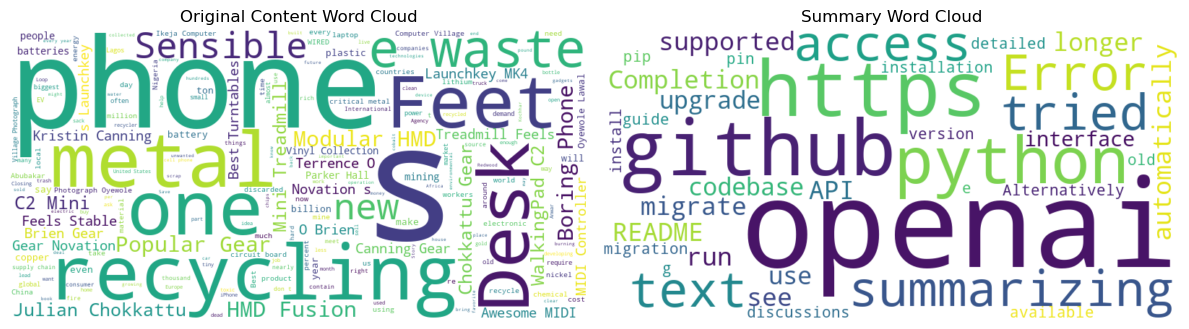

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the original text
wordcloud_original = WordCloud(width=800, height=400, background_color='white').generate(website.text)

# Generate a word cloud for the summary
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(summary)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Original Wordcloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.title("Original Content Word Cloud")
plt.axis('off')

# Summary Wordcloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.title("Summary Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()


# Enhanced Text Preprocessing

In [23]:
import spacy
from nltk.corpus import stopwords

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """
    Clean text by lemmatizing and removing stopwords.
    """
    doc = nlp(text)
    cleaned_text = " ".join([token.lemma_ for token in doc if token.text.lower() not in stop_words])
    return cleaned_text

# Clean the original text
cleaned_text = clean_text(website.text)
print(f"Cleaned Text (first 500 chars): {cleaned_text[:500]}...")


Cleaned Text (first 500 chars): skip main content 
 Open Navigation Menu 
 Menu 
 $ 60 billion Potential Hiding discard Gadgets 
 Security 
 Politics 
 Gear 
 Big Story 
 Business 
 Science 
 Culture 
 Ideas 
 Merch 
 Black Friday 
 
 Chevron 
 Search 
 Search 
 Security 
 Politics 
 Gear 
 Big Story 
 Business 
 Science 
 Culture 
 Ideas 
 Merch 
 Black Friday 
 Podcasts 
 Video 
 Newsletters 
 Magazine 
 Travel 
 Steven Levy 's Plaintext Column 
 wire classic Archive 
 event 
 WIRED Insider 
 WIRED Consulting 
 Jobs 
 coupon...


# Extractive Summarization with Hugging Face

In [25]:
import spacy
from nltk.corpus import stopwords

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """
    Clean text by lemmatizing and removing stopwords.
    """
    doc = nlp(text)
    cleaned_text = " ".join([token.lemma_ for token in doc if token.text.lower() not in stop_words])
    return cleaned_text

# Example usage
cleaned_text = clean_text("This is an example sentence to clean.")
print(cleaned_text)


example sentence clean .


# Implementing Caching

In [26]:
import sqlite3

# Create a database connection
conn = sqlite3.connect('summarization_cache.db')
c = conn.cursor()

# Create table for storing summaries
c.execute('''CREATE TABLE IF NOT EXISTS summaries (url TEXT, summary TEXT)''')

def cache_summary(url, summary):
    c.execute("INSERT INTO summaries (url, summary) VALUES (?, ?)", (url, summary))
    conn.commit()

def get_cached_summary(url):
    c.execute("SELECT summary FROM summaries WHERE url=?", (url,))
    result = c.fetchone()
    return result[0] if result else None


# Scraping and Summarizing Multiple URLs

In [27]:
from tqdm import tqdm

def summarize_multiple_urls(url_list):
    summaries = {}
    
    for url in tqdm(url_list, desc="Summarizing URLs"):
        # Check if the summary is cached
        cached_summary = get_cached_summary(url)
        if cached_summary:
            summaries[url] = cached_summary
        else:
            try:
                website = Website(url)
                summary = website.get_summary()
                summaries[url] = summary
                cache_summary(url, summary)
            except Exception as e:
                summaries[url] = f"Error: {str(e)}"
    
    return summaries

# Example URLs for testing
urls = [
    "https://www.tomshardware.com/pc-components/cpus/intels-fastest-gaming-chip-hits-all-time-low-for-black-friday-core-i9-14900k-drops-to-usd413",
    "https://www.bbc.com/news/world-59334334"
]

summaries = summarize_multiple_urls(urls)

# Display the summaries
for url, summary in summaries.items():
    print(f"\nURL: {url}")
    print(f"Summary: {summary}\n")


Summarizing URLs: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


URL: https://www.tomshardware.com/pc-components/cpus/intels-fastest-gaming-chip-hits-all-time-low-for-black-friday-core-i9-14900k-drops-to-usd413
Summary: Error summarizing text: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742



URL: https://www.bbc.com/news/world-59334334
Summary: Error: 'NoneType' object is not callable

